In [6]:
# ==================================================================================================
# CLASIFICADOR DE TENIS POR ESTILO 24-10-2025 (muchgas carpetas) seleccion en explorador archivos
# ==================================================================================================

import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

# =====================================================
# 1. CONFIGURACIÓN
# =====================================================

dataset_dir = "tenis_dataset"  # Carpeta principal que contiene las 5 subcarpetas
model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# =====================================================
# 2. FUNCIONES
# =====================================================

def extraer_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feat = model.predict(x, verbose=0)
    return feat[0]

def promedio_color(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mean_color = img.mean(axis=(0,1))
    return mean_color

# =====================================================
# 3. CALCULAR VECTOR PROMEDIO PARA CADA TENIS
# =====================================================

tenis_features = {}
tenis_colors = {}

for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    feats, cols = [], []
    for fname in os.listdir(class_path):
        if fname.lower().endswith(".jpg"):
            path = os.path.join(class_path, fname)
            feats.append(extraer_features(path))
            cols.append(promedio_color(path))
    
    feats = np.array(feats)
    cols = np.array(cols)
    tenis_features[class_name] = feats.mean(axis=0)
    tenis_colors[class_name] = cols.mean(axis=0)
    print(f"✅ Procesadas {len(feats)} imágenes para {class_name}")

# Guardar
np.save("tenis_features.npy", tenis_features)
np.save("tenis_colors.npy", tenis_colors)
print("\n✅ Vectores promedio creados para todos los tenis.\n")

# =====================================================
# 4. CLASIFICAR UNA IMAGEN NUEVA
# =====================================================

def clasificar_tenis(imagen_nueva, alpha=0.8):
    tenis_features = np.load("tenis_features.npy", allow_pickle=True).item()
    tenis_colors = np.load("tenis_colors.npy", allow_pickle=True).item()

    feat_new = extraer_features(imagen_nueva)
    color_new = promedio_color(imagen_nueva)

    resultados = []

    for nombre, feat_avg in tenis_features.items():
        color_avg = tenis_colors[nombre]
        
        sim_forma = cosine_similarity([feat_new], [feat_avg])[0][0]
        dist_color = np.linalg.norm(color_avg - color_new)
        sim_color = 1 / (1 + dist_color)
        
        sim_total = alpha * sim_forma + (1 - alpha) * sim_color
        resultados.append((nombre, sim_total))
    
    resultados.sort(key=lambda x: x[1], reverse=True)
    mejor = resultados[0]

    # Mostrar resultado visual
    plt.figure(figsize=(5,5))
    plt.imshow(image.load_img(imagen_nueva))
    plt.title(f"Predicción: {mejor[0]}\nSimilitud: {mejor[1]:.3f}")
    plt.axis('off')
    plt.show()

    print("🔍 Resultados de similitud:")
    for nombre, sim in resultados:
        print(f" - {nombre}: {sim:.3f}")

# =====================================================
# 5. SELECCIONAR IMAGEN DESDE EXPLORADOR
# =====================================================

def seleccionar_y_clasificar(alpha=0.8):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    file_path = filedialog.askopenfilename(
        title="Selecciona una imagen para clasificar",
        filetypes=[("Archivos de imagen", "*.jpg *.jpeg *.png")]
    )
    if not file_path:
        print("❌ No se seleccionó ninguna imagen.")
        return
    
    print(f"🆕 Analizando: {os.path.basename(file_path)}")
    clasificar_tenis(file_path, alpha)


C:\Users\hp\AppData\Local\Temp\ipykernel_11968\1654762700.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


✅ Procesadas 7 imágenes para 01 nike free metcon 6 beige cafe
✅ Procesadas 2 imágenes para 01 nike free metcon 6 blanca rosa
✅ Procesadas 5 imágenes para 01 nike free metcon 6 negra blanca
✅ Procesadas 1 imágenes para 01 nike_AF1_azul_rosa
✅ Procesadas 36 imágenes para 01 nike_AF1_cream
✅ Procesadas 1 imágenes para 01 nike_AF1_gris_blanca_dorada
✅ Procesadas 4 imágenes para 01 nike_AF1_negra_crema_rosa
✅ Procesadas 1 imágenes para 01 nike_AF1_rust_pink
✅ Procesadas 9 imágenes para 01 nike_AF1_undefeated_blanca_gris
✅ Procesadas 1 imágenes para 01 nike_AF1_valentinesDay2023_blanca_roja_rosa
✅ Procesadas 1 imágenes para 01 nike_AF1_valentinesDay2025_gris_blanca_rosa
✅ Procesadas 2 imágenes para 01 nike_airmax_97_blanca_cafe
✅ Procesadas 11 imágenes para 01 nike_airmax_beige_negra_naranja
✅ Procesadas 55 imágenes para 01 nike_airmax_dia_muertos
✅ Procesadas 3 imágenes para 01 nike_airmax_los_rudos_blanca_negra
✅ Procesadas 41 imágenes para 01 nike_airmax_roja
✅ Procesadas 5 imágenes para 

🆕 Analizando: 1760373320027.jpeg


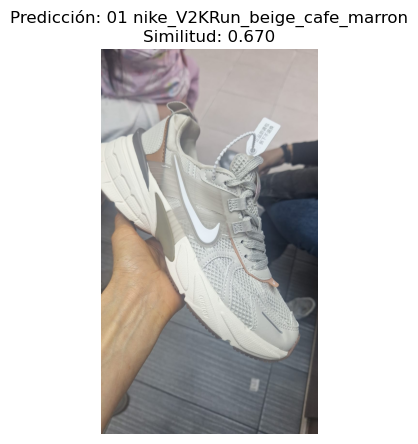

🔍 Resultados de similitud:
 - 01 nike_V2KRun_beige_cafe_marron: 0.670
 - 01 nike_V2Krun_blanca_beige_negra: 0.658
 - 01 nike_V2Krun_beige_cafe_blanca: 0.653
 - 29 jordan_cadence_gris_amarilla_pastel: 0.638
 - 06 NB_9060_gris_amarilla: 0.631
 - 29 jordan_cadence_gris_roja_negra: 0.601
 - 06 NB_9060_gris_verde_oliva_claro: 0.600
 - 01 nike_skate_beige_gris: 0.597
 - 01 nike_sb_premium_verde_oliva: 0.595
 - 01 nike_P6000_plata_blanca_negra: 0.593
 - 24 valentino_diamante_blanca: 0.593
 - 01 nike_sb_blanca_negra: 0.593
 - 06 NB_9060_gris_amarilla_negra: 0.591
 - 01 nike_sb_rayssa_leal: 0.577
 - 02 adidas_fuego_blanca_rosa_naranja: 0.575
 - 01 nike_tn_blanca_rosa: 0.574
 - 04 reebok_Revenge: 0.569
 - 01 nike free metcon 6 beige cafe: 0.567
 - 01 nike_tn_blanca: 0.567
 - 02 adidas_gazelle_blanca_azul_gris: 0.564
 - 01 nike_AF1_undefeated_blanca_gris: 0.564
 - ABmagenes_origen: 0.563
 - 01 nike_skate_blanca_gris: 0.562
 - 01 nike_AF1_cream: 0.562
 - 02 adidas_fuego_blanca_mora: 0.562
 - 02 ad

In [5]:
# =====================================================
# 6. EJECUCIÓN
# =====================================================

# Ejecuta esta línea para abrir el explorador y clasificar una imagen
seleccionar_y_clasificar(alpha=0.8)